In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
# File to Load 
mouse_drug_data = "data_mouse_drug/mouse_drug_data.csv"
clinical_trial_data = "data_mouse_drug/clinicaltrial_data.csv"
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data)
clinicaltrial_df = pd.read_csv(clinical_trial_data)
# mouse_drug_df.head()
# clinicaltrial_df.head()

In [4]:
# Combine the data into a single dataset
mouse_df = pd.merge(clinicaltrial_df,mouse_drug_df, how = "left", on = ["Mouse ID","Mouse ID"])
mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,f932,0,45.000000,0,Ketapril
2,g107,0,45.000000,0,Ketapril
3,a457,0,45.000000,0,Ketapril
4,c819,0,45.000000,0,Ketapril
...,...,...,...,...,...
1901,r944,45,41.581521,2,Capomulin
1902,u364,45,31.023923,3,Capomulin
1903,p438,45,61.433892,1,Ceftamin
1904,x773,45,58.634971,4,Placebo


## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor = mouse_df.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)']
sem_tumor = mouse_df.groupby(['Drug','Timepoint']).sem()['Tumor Volume (mm3)']

# Convert to DataFrame
mean_tumor = pd.DataFrame(mean_tumor)
mean_tumor = mean_tumor.reset_index()
sem_tumor = pd.DataFrame(sem_tumor)
sem_tumor = sem_tumor.reset_index()

# Preview DataFrame
mean_tumor_pivot = mean_tumor.pivot(index='Timepoint', columns='Drug')["Tumor Volume (mm3)"]
sem_tumor_pivot = sem_tumor.pivot(index='Timepoint', columns='Drug')["Tumor Volume (mm3)"]
# sem_tumor_pivot

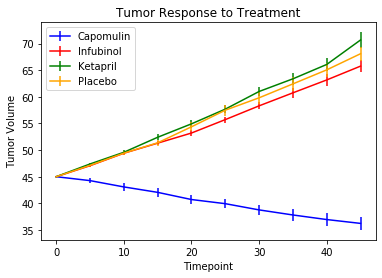

In [6]:
plt.title("Tumor Response to Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.errorbar(mean_tumor_pivot.index,mean_tumor_pivot["Capomulin"],yerr=sem_tumor_pivot["Capomulin"], color="blue",label="Capomulin")
plt.errorbar(mean_tumor_pivot.index,mean_tumor_pivot["Infubinol"],yerr=sem_tumor_pivot["Infubinol"], color="red",label="Infubinol")
plt.errorbar(mean_tumor_pivot.index,mean_tumor_pivot["Ketapril"],yerr=sem_tumor_pivot["Ketapril"], color="green",label="Ketapril")
plt.errorbar(mean_tumor_pivot.index,mean_tumor_pivot["Placebo"],yerr=sem_tumor_pivot["Placebo"], color="orange",label="Placebo")
plt.legend(loc="best")

In [7]:
# Save the Figure

# Do all the x axis y axis and legend shit

In [8]:
# Show the Figure

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_meta = mouse_df.groupby(['Drug','Timepoint']).mean()['Metastatic Sites']
sem_meta = mouse_df.groupby(['Drug','Timepoint']).sem()['Metastatic Sites']
# Convert to DataFrame
mean_meta = pd.DataFrame(mean_meta)
mean_meta = mean_meta.reset_index()
sem_meta = pd.DataFrame(sem_meta)
sem_meta = sem_meta.reset_index()
# Preview DataFrame
mean_meta_pivot = mean_meta.pivot(index='Timepoint', columns='Drug')["Metastatic Sites"]
sem_meta_pivot = sem_meta.pivot(index='Timepoint', columns='Drug')["Metastatic Sites"]
# sem_meta_pivot

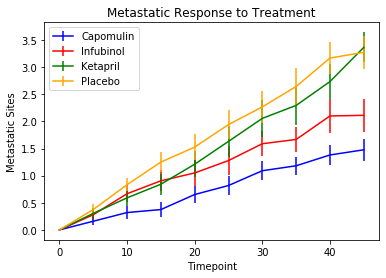

In [10]:
plt.title("Metastatic Response to Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Metastatic Sites")
# plt.legend(loc="best")
plt.errorbar(mean_meta_pivot.index,mean_meta_pivot["Capomulin"],yerr=sem_meta_pivot["Capomulin"], color="blue",label="Capomulin")
plt.errorbar(mean_meta_pivot.index,mean_meta_pivot["Infubinol"],yerr=sem_meta_pivot["Infubinol"], color="red",label="Infubinol")
plt.errorbar(mean_meta_pivot.index,mean_meta_pivot["Ketapril"],yerr=sem_meta_pivot["Ketapril"], color="green",label="Ketapril")
plt.errorbar(mean_meta_pivot.index,mean_meta_pivot["Placebo"],yerr=sem_meta_pivot["Placebo"], color="orange",label="Placebo")
plt.legend(loc="best")

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_count = mouse_df.groupby(['Drug','Timepoint']).count()['Tumor Volume (mm3)']
# Convert to DataFrame
survival_count = pd.DataFrame(survival_count)
survival_count = survival_count.reset_index()
survival_count_pivot = survival_count.pivot(index='Timepoint', columns='Drug')["Tumor Volume (mm3)"]
# Preview DataFrame
# survival_count_pivot
survival_rate_c = pd.DataFrame(survival_count_pivot['Capomulin']/25)
survival_rate_i = pd.DataFrame(survival_count_pivot['Infubinol']/25)
survival_rate_k = pd.DataFrame(survival_count_pivot['Ketapril']/25)
survival_rate_p = pd.DataFrame(survival_count_pivot['Placebo']/25)
# ,(survival_count_pivot['Infubinol']/25),(survival_count_pivot['Ketapril']/25),(survival_count_pivot['Placebo']/25))
# survival_rate_c.append(survival_rate_i)
# survival_rate_c

In [12]:
survival_rate_ci = pd.merge(survival_rate_c,survival_rate_i, how = "left", on = ["Timepoint"])
survival_rate_cik = pd.merge(survival_rate_ci,survival_rate_k, how = "left", on = ["Timepoint"])
survival_rate_cikp = pd.merge(survival_rate_cik,survival_rate_p, how = "left", on = ["Timepoint"])
# survival_rate_cikp

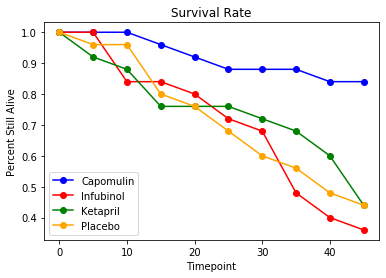

In [13]:
plt.title("Survival Rate")
plt.xlabel("Timepoint")
plt.ylabel("Percent Still Alive")
plt.plot(survival_count_pivot['Capomulin']/25, marker="o", color="blue", label='Capomulin')
plt.plot(survival_count_pivot['Infubinol']/25, marker="o", color="red", label='Infubinol')
plt.plot(survival_count_pivot['Ketapril']/25, marker="o", color="green", label='Ketapril')
plt.plot(survival_count_pivot['Placebo']/25, marker="o", color="orange", label='Placebo')
plt.legend(loc="best")

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
tumor_percentage_change = (mean_tumor_pivot.iloc[-1] - mean_tumor_pivot.iloc[0])/mean_tumor_pivot.iloc[0] *100

In [47]:
percent_change = pd.DataFrame(tumor_percentage_change)
percent_change = percent_change.iloc[[0,2,3,5]]
percent_change.reset_index(inplace=False)
percent_change.unstack()
percent_change.rename(columns={0:'Percentage Change'}, inplace=True)
percent_change
# percent_change_unstacked = pd.DataFrame(percent_change)
# percent_change_unstacked
# percent_change.rename(columns={'': 'Percentage Change'})
# percent_change
# change the name of this column...why isnt this working

,Percentage Change
Drug,
Capomulin,-19.475303
Infubinol,46.123472
Ketapril,57.028795
Placebo,51.297960


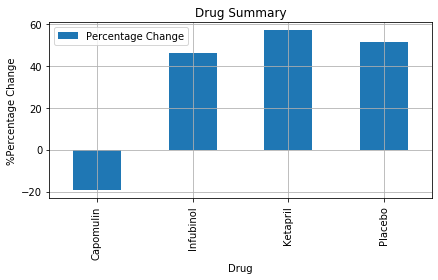

In [48]:
percent_change.plot(kind="bar", title="Drug Summary", label="Drug")
plt.grid()
plt.tight_layout()
plt.ylabel('%Percentage Change')
plt.legend(loc="best")